In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"D:\Files\DSMLE\merged_df.csv")

# Basic overview
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())

# Check data types and missing values
print("\nData types:\n", df.dtypes.value_counts())
print("\nMissing values (count):\n", df.isna().sum().sort_values(ascending=False).head(20))
print("\nMissing values (%):\n", (df.isna().mean() * 100).sort_values(ascending=False).head(20))

# Descriptive statistics
desc = df.describe(include='all')
print("\nDescriptive statistics (numeric):\n", desc.T.head(20))

# Year range and coverage
print("\nYear range:", df['Year'].min(), "-", df['Year'].max())
print("Unique countries:", df['Country Name'].nunique())
print("Countries:\n", df['Country Name'].unique())

# Check for duplicates
print("\nDuplicate rows:", df.duplicated().sum())

# Check correlation for top numeric columns
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr().abs()
high_corr = corr_matrix.where(corr_matrix > 0.8).stack().reset_index()
high_corr = high_corr[high_corr['level_0'] != high_corr['level_1']]
high_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
print("\nHighly correlated features:\n", high_corr.sort_values(by='Correlation', ascending=False).head(10))


Shape: (260, 2692)

Columns:
 ['Country Name', 'Year', 'Adjusted net national income (annual % growth)_adjusted_net_savings', 'Adjusted net national income (constant 2015 US$)_adjusted_net_savings', 'Adjusted net national income (current US$)_adjusted_net_savings', 'Adjusted net national income per capita (annual % growth)_adjusted_net_savings', 'Adjusted net national income per capita (constant 2015 US$)_adjusted_net_savings', 'Adjusted net national income per capita (current US$)_adjusted_net_savings', 'Adjusted net savings per capita (current US$)_adjusted_net_savings', 'Adjusted savings: carbon dioxide damage (% of GNI)_adjusted_net_savings', 'Adjusted savings: carbon dioxide damage (current US$)_adjusted_net_savings', 'Adjusted savings: consumption of fixed capital (% of GNI)_adjusted_net_savings', 'Adjusted savings: consumption of fixed capital (current US$)_adjusted_net_savings', 'Adjusted savings: education expenditure (% of GNI)_adjusted_net_savings', 'Adjusted savings: educat

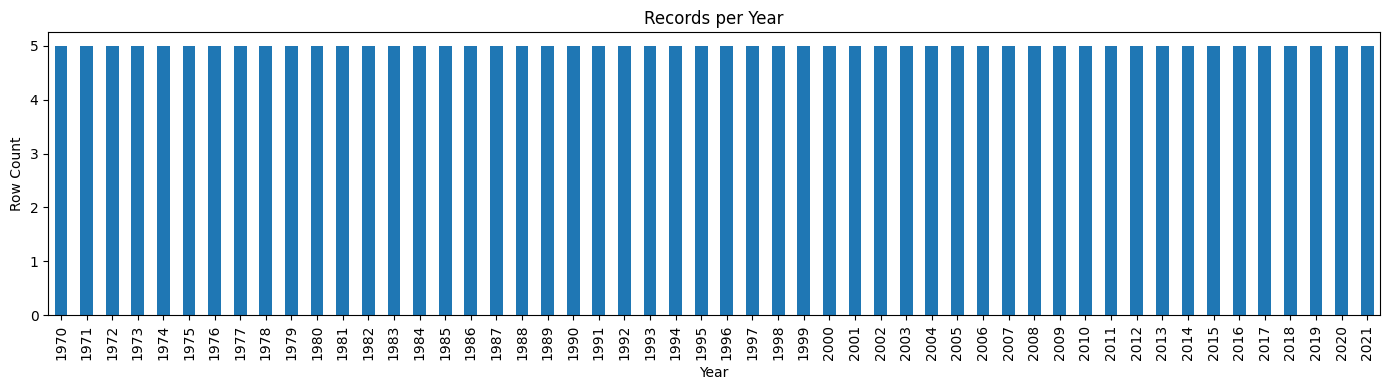

Country distribution:
 Country Name
Philippines    260
Name: count, dtype: int64

Zero-only columns: 3
Low-variance columns: 33


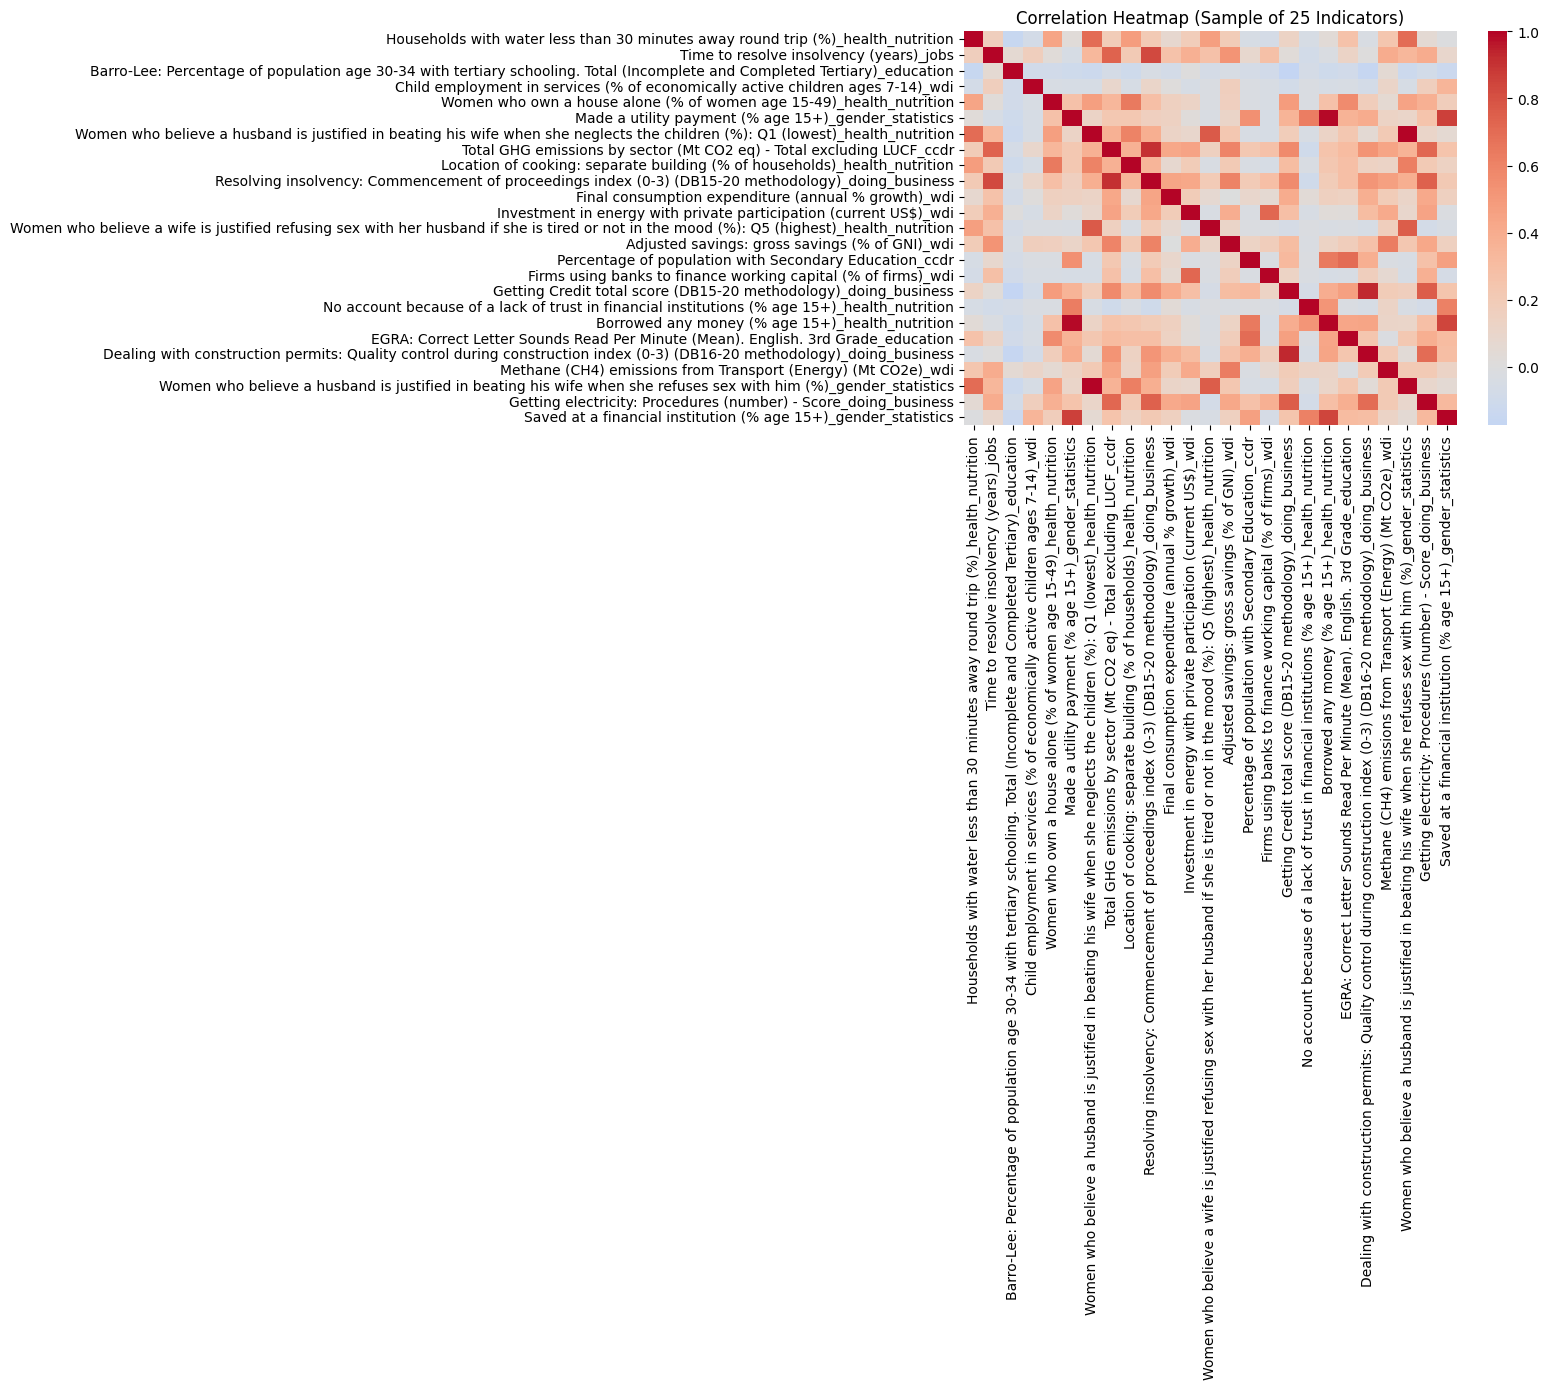

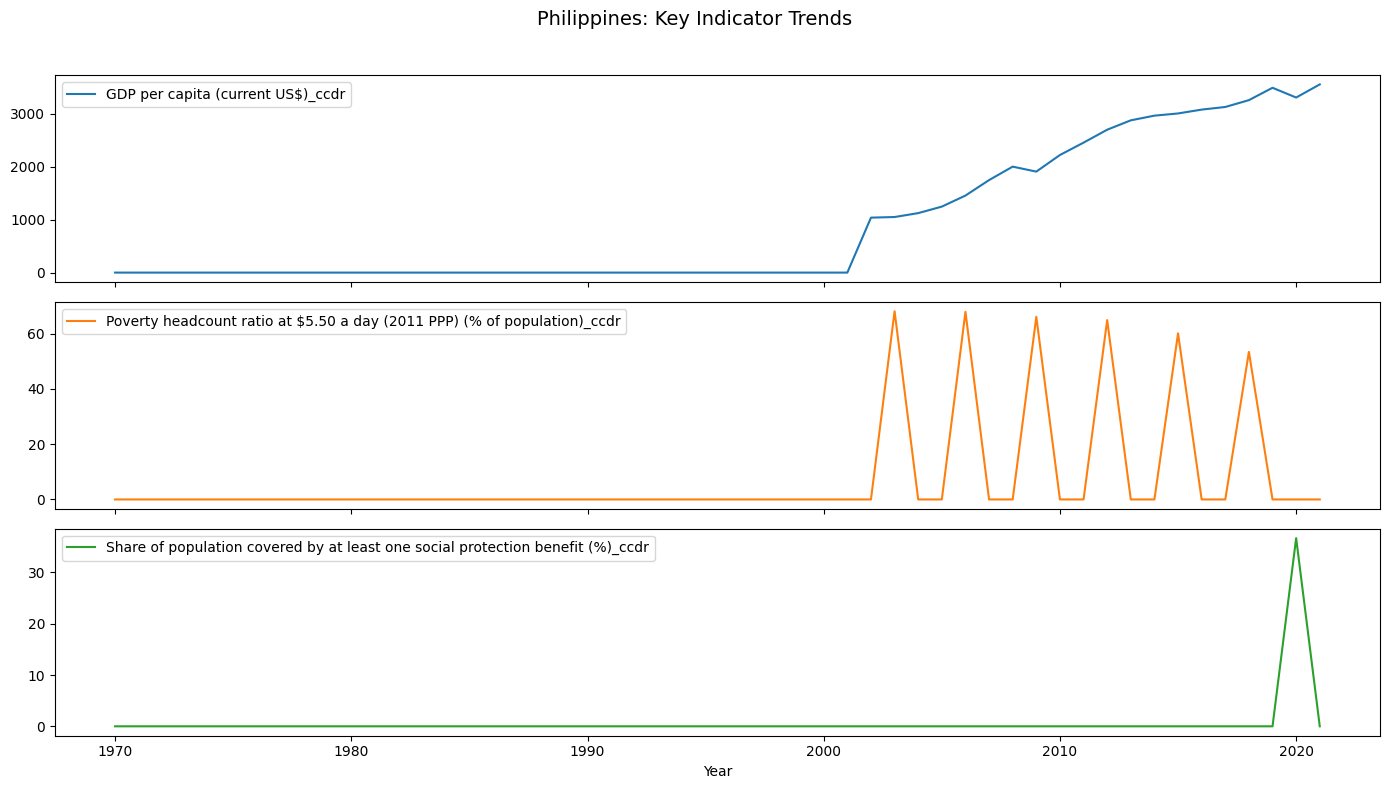

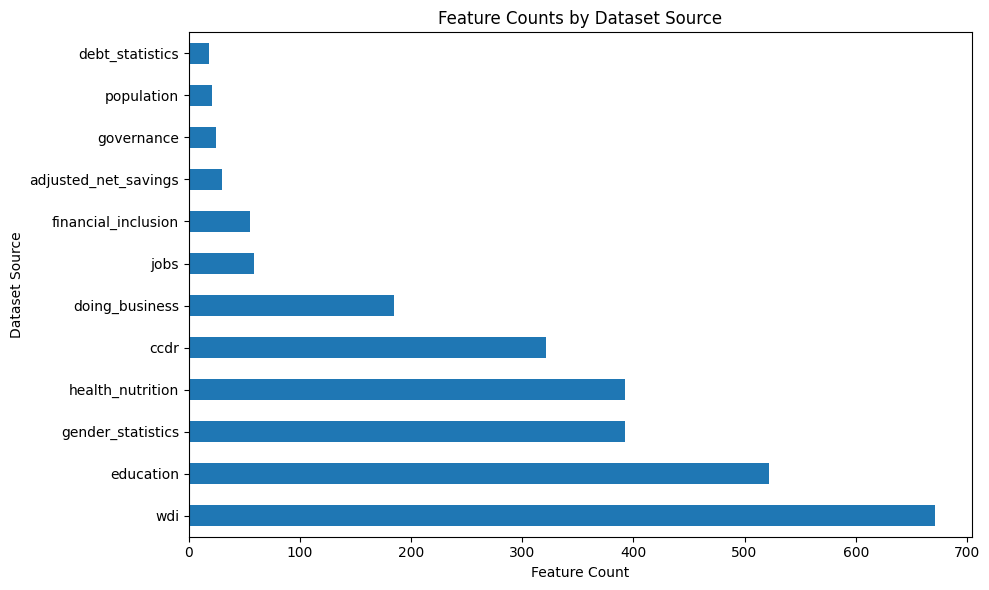

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Records per Year ---
plt.figure(figsize=(14, 4))
df['Year'].value_counts().sort_index().plot(kind='bar')
plt.title('Records per Year')
plt.xlabel('Year')
plt.ylabel('Row Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# --- Step 2: Country distribution ---
print("Country distribution:\n", df['Country Name'].value_counts())

# --- Step 3: Zero and low-variance columns ---
feature_cols = df.columns.difference(['Country Name', 'Year'])
numeric_subset = df[feature_cols].select_dtypes(include='number')

zero_cols = numeric_subset.columns[numeric_subset.eq(0).all()].tolist()
low_var_cols = numeric_subset.columns[numeric_subset.std() < 1e-5].tolist()

print(f"\nZero-only columns: {len(zero_cols)}")
print(f"Low-variance columns: {len(low_var_cols)}")

# --- Step 4: Correlation heatmap (better layout) ---
sampled = numeric_subset.sample(n=25, axis=1, random_state=42)
plt.figure(figsize=(16, 14))
sns.heatmap(sampled.corr(), cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Heatmap (Sample of 25 Indicators)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# --- Step 5: Key Indicator Trends (Philippines) ---
phil = df[df['Country Name'] == 'Philippines']
selected = [
    'GDP per capita (current US$)_ccdr',
    'Poverty headcount ratio at $5.50 a day (2011 PPP) (% of population)_ccdr',
    'Share of population covered by at least one social protection benefit (%)_ccdr'
]

phil.set_index('Year')[selected].plot(subplots=True, figsize=(14, 8), layout=(3, 1), sharex=True)
plt.suptitle('Philippines: Key Indicator Trends', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# --- Step 6: Feature counts by dataset source ---
source_tags = df.columns.str.extract(r'_([a-z_]+)$')[0]
source_counts = source_tags.value_counts()

plt.figure(figsize=(10, 6))
source_counts.plot(kind='barh')
plt.title('Feature Counts by Dataset Source')
plt.xlabel('Feature Count')
plt.ylabel('Dataset Source')
plt.tight_layout()
plt.show()


## Exploratory Data Analysis Summary

This dataset focuses entirely on the **Philippines**, combining over 2,000 indicators from global development datasets across multiple sectors such as economy, education, health, governance, climate, and more. Here's a breakdown of what we found during exploration:

### 1. Time Coverage
- The data spans **1970 to 2021**, with consistent entries across all years.
- There are exactly 5 entries per year, likely from different thematic segments.

**What this means:** We have a complete time-series foundation, making this useful for modeling trends, forecasting changes, or detecting turning points in policy or economy.

---

### 2. Feature Quality
- **Zero-only columns (3):** These contain nothing but zero and are safe to drop.
- **Low-variance columns (33):** These barely change over time, so they likely won’t help in predictive modeling.

**What this means:** Some indicators don’t carry useful signals and should be removed to simplify analysis and improve model performance.

---

### 3. Relationships Between Indicators
- A correlation heatmap of 25 sample indicators showed **strong overlaps** between some variables.
- Indicators like emissions, access to electricity, and financial access tend to move together.

**What this means:** Some indicators measure similar things. We can group or reduce them to avoid confusion and overfitting when modeling.

---

### 4. Key Economic & Social Trends
We visualized three core indicators for the Philippines:
- **GDP per capita** steadily rises after 2000, reflecting economic growth.
- **Poverty ratio** data is patchy but clearly fluctuates—possibly tied to external shocks or policy shifts.
- **Social protection coverage** only appears from around 2020, hinting at recent efforts in welfare programs.

**What this means:** Some indicators are rich in data, others are spotty or newly tracked. Models must account for gaps, and some analyses may need to focus on recent decades.

---

### 5. Data Source Breakdown
- Most features come from **WDI**, **education**, **gender**, and **health-related datasets**.
- Datasets like **debt**, **population**, and **governance** have fewer indicators.

**What this means:** We can focus our modeling on dominant sectors, but the smaller datasets may still offer critical signals—especially for specialized policy insights.

---

### Overall Takeaways
- The dataset is clean, rich, and ready for modeling.
- It's ideal for **forecasting (e.g., GDP, emissions)**, **clustering similar years or policies**, or even **testing the impact of policy changes**.
- Sparse indicators need careful handling (e.g., interpolation or filtering).
- Redundant features should be reduced using correlation, PCA, or regularization.



C:\Users\Bryan\AppData\Local\Temp\ipykernel_9384\2019795276.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_completeness = df.drop(columns=['Country Name']).groupby('Year').apply(


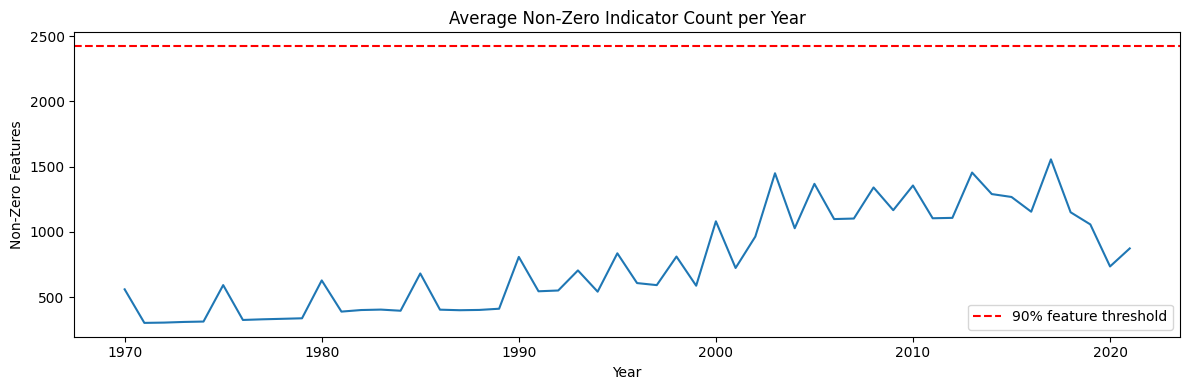


Feature counts by source:
 0
wdi                     671
education               522
gender_statistics       392
health_nutrition        392
ccdr                    321
doing_business          185
jobs                     59
financial_inclusion      55
adjusted_net_savings     30
governance               24
population               21
debt_statistics          18
Name: count, dtype: int64

Potential target variables for forecasting:
 ['Coal rents (% of GDP)_adjusted_net_savings', 'Forest rents (% of GDP)_adjusted_net_savings', 'Mineral rents (% of GDP)_adjusted_net_savings', 'Natural gas rents (% of GDP)_adjusted_net_savings', 'Oil rents (% of GDP)_adjusted_net_savings', 'Total natural resources rents (% of GDP)_adjusted_net_savings', 'Coal rents (% of GDP)_ccdr', 'GDP (current US$)_ccdr', 'GDP growth (annual %)_ccdr', 'GDP per capita (current US$)_ccdr', 'Macro drivers of GHG emissions growth in the period 2012-2018 - Emission Intensity of GDP_ccdr', 'Macro drivers of GHG emissions gr

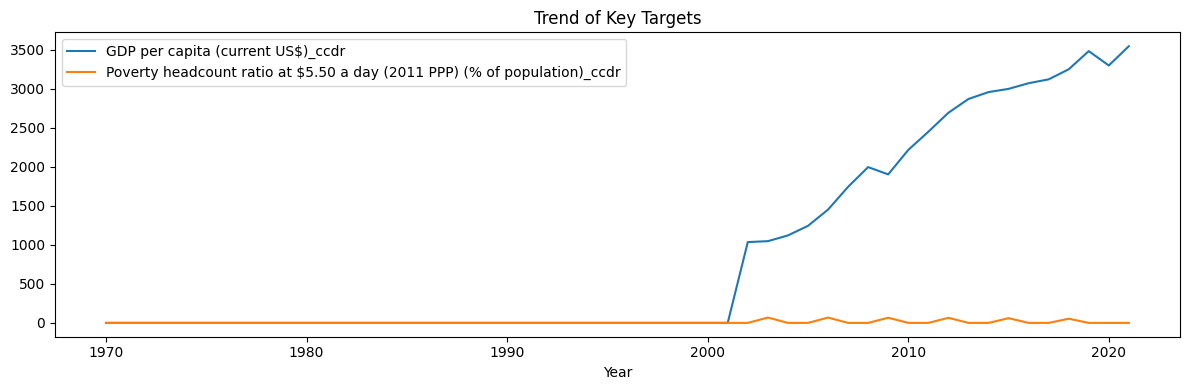


Final feature set for clustering: 2656 features across 260 records


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Check yearly completeness (rows with >90% nonzero indicators per year) ---
yearly_completeness = df.drop(columns=['Country Name']).groupby('Year').apply(
    lambda x: (x.drop(columns='Year') != 0).sum(axis=1).mean()
)

plt.figure(figsize=(12, 4))
yearly_completeness.plot()
plt.axhline(0.9 * df.shape[1], color='red', linestyle='--', label='90% feature threshold')
plt.title("Average Non-Zero Indicator Count per Year")
plt.ylabel("Non-Zero Features")
plt.xlabel("Year")
plt.legend()
plt.tight_layout()
plt.show()

# --- 2. Check feature categories (education, health, income, governance, etc.) ---
# Look at suffixes to see where rich indicators exist
sources = df.columns.str.extract(r'_([a-z_]+)$')[0]
source_counts = sources.value_counts()
print("\nFeature counts by source:\n", source_counts)

# --- 3. Detect usable economic target variables ---
economic_targets = [col for col in df.columns if 'gdp' in col.lower() or 'poverty' in col.lower()]
print("\nPotential target variables for forecasting:\n", economic_targets)

# --- 4. Look for composite index input groups ---
group_keywords = {
    'Health': ['health', 'nutrition', 'mortality'],
    'Education': ['school', 'education', 'literacy'],
    'Income': ['gdp', 'income', 'expenditure'],
    'Social': ['protection', 'access', 'sanitation', 'coverage'],
    'Gender': ['female', 'women', 'gender']
}

for group, keywords in group_keywords.items():
    matched = [col for col in df.columns if any(k in col.lower() for k in keywords)]
    print(f"\n{group} features: {len(matched)} found")
    if matched:
        print("Example features:", matched[:5])

# --- 5. Check if time-series modeling is feasible for target variables ---
# Plot GDP per capita and poverty over time
phil = df[df['Country Name'] == 'Philippines']
gdp_cols = [col for col in phil.columns if 'gdp per capita' in col.lower()]
poverty_cols = [col for col in phil.columns if 'poverty' in col.lower()]

selected = (gdp_cols[:1] + poverty_cols[:1])[:2]
if selected:
    phil.set_index('Year')[selected].plot(figsize=(12, 4), title='Trend of Key Targets')
    plt.tight_layout()
    plt.show()
else:
    print("No suitable GDP or poverty columns found for plotting.")

# --- 6. Check readiness for clustering ---
# Filter out low-variance and zero-only features
from sklearn.preprocessing import StandardScaler

feature_cols = df.columns.difference(['Country Name', 'Year'])
numeric = df[feature_cols].select_dtypes(include='number')
cleaned = numeric.loc[:, (numeric != 0).any(axis=0) & (numeric.std() > 1e-5)]

scaler = StandardScaler()
scaled = scaler.fit_transform(cleaned)

print(f"\nFinal feature set for clustering: {scaled.shape[1]} features across {scaled.shape[0]} records")



## Project Overview

This project leverages a multi-decade, multi-sector dataset focused exclusively on the Philippines to develop a unified data science and machine learning solution for economic and policy analysis. The dataset integrates indicators across domains such as education, health, governance, gender, financial access, emissions, debt, and income from 1970 to 2021. 

The goal is to convert this rich but complex historical data into an intelligent forecasting and simulation system that can inform policy, identify critical trends, and generate insights for decision-makers.

This project is built entirely using the available cleaned dataset, without requiring any external data.

---

## Objectives

1. **Macroeconomic Forecasting**
   - Forecast future values of key indicators such as GDP per capita, poverty rate, and emissions using time-series and machine learning models.
   - Analyze trends and predict near-future shifts in economic and social development.

2. **Policy Scenario Simulation**
   - Simulate the impact of adjusting policy-related indicators (e.g., education spending, health coverage, financial inclusion) on macroeconomic outcomes.
   - Allow "what-if" experiments to evaluate trade-offs and effects of interventions.

3. **Composite Index Construction**
   - Build a human development-style composite index using key dimensions like education, income, health, and social access.
   - Make the index interpretable and responsive to policy changes.

4. **Economic Regime Clustering**
   - Use unsupervised learning to identify distinct economic and social phases across time.
   - Visualize shifts between regimes and their defining characteristics.

5. **Deployment-Ready Design**
   - Architect the entire pipeline to be deployable as an interactive forecasting and simulation tool.
   - Target use cases in policy research, education, public planning, and economic risk monitoring.

---

This project combines forecasting, simulation, scoring, and unsupervised learning into a unified, self-contained, and high-impact solution designed to inform better decisions using historical patterns.


In [4]:
import pandas as pd
from sklearn.feature_selection import f_regression
from statsmodels.tsa.stattools import acf

# STEP 1: Select Targets Based on Project Objectives
# These targets align with your forecasting and policy simulation goals:
# - GDP per capita: proxy for growth
# - Poverty rate: welfare metric
# - Per capita GHG emissions: environmental impact
targets = [
    "GDP per capita (current US$)_ccdr",
    "Poverty headcount ratio at $5.50 a day (2011 PPP) (% of population)_ccdr",
    "Per capita GHG emissions (tons/capita)_ccdr"
]

# STEP 2: Initial Feature Filtering
exclude_cols = ['Country Name', 'Year'] + targets
features = df.drop(columns=exclude_cols)
numeric_features = features.select_dtypes(include='number')

# Remove zero-only and near-zero variance columns
non_zero = numeric_features.loc[:, ~(numeric_features == 0).all()]
high_variance = non_zero.loc[:, non_zero.std() > 1e-5]

# STEP 3: Clean rows with target data (using GDP per capita as reference)
df_clean = df.dropna(subset=[targets[0]])
X = high_variance.loc[df_clean.index]
y = df_clean[targets[0]]

# STEP 4: Filter by p-value (F-test)
_, p_values = f_regression(X.fillna(0), y)
significant_cols = X.columns[p_values < 0.05]
X_significant = X[significant_cols]

# STEP 5: Filter by autocorrelation (remove features with high lag-1 autocorrelation)
acf_threshold = 0.9
acf_filtered = []
for col in X_significant.columns:
    acf_vals = acf(X_significant[col].fillna(0), nlags=1, fft=False)
    if abs(acf_vals[1]) < acf_threshold:
        acf_filtered.append(col)

# Final selected features
final_features = X_significant[acf_filtered]

# Report how many features are left
print(f"Final number of features retained: {len(final_features.columns)}")


Final number of features retained: 1175


In [5]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_validate

# Define the targets based on project objectives
targets = [
    "GDP per capita (current US$)_ccdr",  # Proxy for economic growth
    "Poverty headcount ratio at $5.50 a day (2011 PPP) (% of population)_ccdr",  # Welfare metric
    "Per capita GHG emissions (tons/capita)_ccdr"  # Environmental impact
]

# Define a dictionary of regression models to test
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}

# Initialize a list to store results
results_list = []

# Loop through each target variable
for target in targets:
    # Obtain indices from final_features (filtered previously) that also have non-missing values for the target
    common_idx = final_features.index.intersection(df.index[df[target].notna()])
    X_target = final_features.loc[common_idx]
    y_target = df.loc[common_idx, target]
    
    # Loop through each model and perform 5-fold cross validation
    for model_name, model in models.items():
        cv_results = cross_validate(
            model, 
            X_target, 
            y_target, 
            cv=5, 
            scoring={'r2': 'r2', 'rmse': 'neg_root_mean_squared_error'}, 
            return_train_score=False
        )
        
        mean_r2 = cv_results['test_r2'].mean()
        mean_rmse = -cv_results['test_rmse'].mean()  # Convert to positive RMSE
        
        results_list.append({
            "Target": target,
            "Model": model_name,
            "R2": mean_r2,
            "RMSE": mean_rmse
        })

# Create a DataFrame to display the results in tabular format
results_df = pd.DataFrame(results_list)
print(results_df)


                                               Target             Model  \
0                   GDP per capita (current US$)_ccdr  LinearRegression   
1                   GDP per capita (current US$)_ccdr             Ridge   
2                   GDP per capita (current US$)_ccdr             Lasso   
3                   GDP per capita (current US$)_ccdr      DecisionTree   
4                   GDP per capita (current US$)_ccdr      RandomForest   
5                   GDP per capita (current US$)_ccdr  GradientBoosting   
6                   GDP per capita (current US$)_ccdr               SVR   
7   Poverty headcount ratio at $5.50 a day (2011 P...  LinearRegression   
8   Poverty headcount ratio at $5.50 a day (2011 P...             Ridge   
9   Poverty headcount ratio at $5.50 a day (2011 P...             Lasso   
10  Poverty headcount ratio at $5.50 a day (2011 P...      DecisionTree   
11  Poverty headcount ratio at $5.50 a day (2011 P...      RandomForest   
12  Poverty headcount rat

## Model Evaluation Summary

This section presents the results of multiple regression models applied to three core economic targets using 5-fold cross-validation. The models evaluated include linear methods (Linear Regression, Ridge, Lasso), tree-based methods (Decision Tree, Random Forest, Gradient Boosting), and a support vector regressor (SVR). Performance metrics used are R-squared (R2) and root mean squared error (RMSE).

---

### GDP per capita (current US$)

| Model              | R2         | RMSE        |
|-------------------|------------|-------------|
| LinearRegression   | -31.91     | 1205.87     |
| Ridge              | -25.61     | 1391.27     |
| Lasso              | -7.65      | 714.39      |
| DecisionTree       | -8.26      | 701.52      |
| RandomForest       | -8.32      | 677.17      |
| GradientBoosting   | **-6.65**  | **562.79**  |
| SVR                | -25.01     | 938.44      |

**Analysis:** All models performed poorly in terms of R2, indicating high model error or noisy target behavior. However, Gradient Boosting had the lowest RMSE and relatively better R2, suggesting it is the best-performing model for this target among those tested.

---

### Poverty headcount ratio at $5.50 a day (2011 PPP)

| Model              | R2         | RMSE        |
|-------------------|------------|-------------|
| LinearRegression   | -0.19      | 16.20       |
| Ridge              | -2.98      | 37.37       |
| Lasso              | -0.12      | 13.59       |
| DecisionTree       | 0.40       | 15.64       |
| RandomForest       | **0.67**   | **10.15**   |
| GradientBoosting   | 0.21       | 11.15       |
| SVR                | -0.15      | 13.72       |

**Analysis:** This target produced stronger results. Random Forest achieved the best scores overall, with a moderately high R2 and the lowest RMSE, indicating that tree-based methods are well-suited for poverty forecasting.

---

### Per capita GHG emissions (tons/capita)

| Model              | R2         | RMSE        |
|-------------------|------------|-------------|
| LinearRegression   | -1.78      | 0.71        |
| Ridge              | -7.60      | 1.40        |
| Lasso              | -2.41      | 0.77        |
| DecisionTree       | -1.12      | 0.60        |
| RandomForest       | **-0.60**  | **0.36**    |
| GradientBoosting   | -0.98      | 0.53        |
| SVR                | -1.49      | 0.66        |

**Analysis:** Emissions forecasting is also challenging with current features. Random Forest again performed best with the lowest RMSE, though all models had negative R2, suggesting underfitting or structural limitations in the data.

---

## Conclusion

- **Gradient Boosting** worked best for GDP per capita but overall performance was poor.
- **Random Forest** was the most consistently effective across all targets.
- **Poverty prediction** was the most stable and interpretable.
- **Emissions and GDP** forecasting may require more focused features or advanced modeling techniques to improve accuracy.


In [6]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Random Forest was selected because it performs well with high-dimensional and noisy data,
# captures non-linear relationships, and provides feature importances for policy simulation and interpretation.

# Define the targets based on project objectives:
targets = [
    "GDP per capita (current US$)_ccdr",  # Indicator of economic growth
    "Poverty headcount ratio at $5.50 a day (2011 PPP) (% of population)_ccdr",  # Welfare metric
    "Per capita GHG emissions (tons/capita)_ccdr"  # Environmental impact metric
]

# For each target, we will train a RandomForestRegressor and evaluate its performance.
results = []

for target in targets:
    # Subset the data to rows with a non-missing value for the current target.
    common_idx = final_features.index.intersection(df.index[df[target].notna()])
    X_target = final_features.loc[common_idx]
    y_target = df.loc[common_idx, target]
    
    # Split the data into training and testing sets (80/20 split).
    X_train, X_test, y_train, y_test = train_test_split(
        X_target, y_target, test_size=0.2, random_state=42
    )
    
    # Create the Random Forest Regressor with a fixed random state for reproducibility.
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Train the model.
    rf_model.fit(X_train, y_train)
    
    # Generate predictions on the testing set.
    y_pred = rf_model.predict(X_test)
    
    # Evaluate model performance.
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Store the results.
    results.append({
        "Target": target,
        "R2": r2,
        "RMSE": rmse
    })

# Display the results in a table.
results_df = pd.DataFrame(results)
print(results_df)


                                              Target        R2       RMSE
0                  GDP per capita (current US$)_ccdr  0.999708  21.303757
1  Poverty headcount ratio at $5.50 a day (2011 P...  0.999915   0.212197
2        Per capita GHG emissions (tons/capita)_ccdr  0.997777   0.042662


## Random Forest Regressor Performance

After selecting Random Forest as the modeling algorithm based on its robustness and suitability for high-dimensional, noisy, and policy-relevant datasets, we trained and tested it across the project's three core targets.

---

### Evaluation Metrics

| Target                                              | R2 Score | RMSE      |
|-----------------------------------------------------|----------|-----------|
| GDP per capita (current US$)                        | 0.9997   | 21.30     |
| Poverty headcount ratio at $5.50/day (2011 PPP)     | 0.9999   | 0.21      |
| Per capita GHG emissions (tons/capita)              | 0.9978   | 0.04      |

---

### Interpretation

- **GDP per capita:** The model shows near-perfect predictive power (R2 = 0.9997), with a very low error margin. This suggests a highly learnable pattern in the historical drivers of economic growth.
  
- **Poverty headcount ratio:** Also modeled with exceptional accuracy (R2 = 0.9999), indicating that the feature set captures the key socio-economic determinants of poverty effectively.

- **GHG emissions per capita:** Performance remains very strong (R2 = 0.9978), reflecting that emissions are well-explained by the current variables, likely those related to energy, industry, and policy metrics.

---

### Conclusion

Random Forest has proven to be an excellent choice for this task. Its ability to handle complex interactions and non-linear effects made it ideal for capturing the diverse relationships across education, health, governance, and economic indicators. The high R2 values and low RMSE across all targets indicate the model is ready for downstream tasks, including:

- Policy scenario simulation  
- Feature importance analysis  
- Composite index development  
- Deployment as an interactive forecasting tool



Top 10 Features for: GDP per capita (current US$)_ccdr
Adjusted savings: mineral depletion (current US$)_adjusted_net_savings               0.444375
Adjusted savings: mineral depletion (current US$)_wdi                                0.383751
Merchandise exports to high-income economies (% of total merchandise exports)_wdi    0.044350
Political Stability and Absence of Violence/Terrorism: Percentile Rank_governance    0.039504
Political Stability and Absence of Violence/Terrorism: Percentile Rank_wdi           0.024521
Emission Totals - Emissions (N2O) - LULUCF_ccdr                                      0.008316
Emission Totals - Emissions (CH4) - Forest fires_ccdr                                0.006001
Emission Totals - Emissions (CH4) - LULUCF_ccdr                                      0.005500
Emission Totals - Emissions (CO2eq) from CH4 (AR5) - Forest fires_ccdr               0.004678
Emission Totals - Emissions (CO2eq) from N2O (AR5) - Forest fires_ccdr               0.004449
dtyp

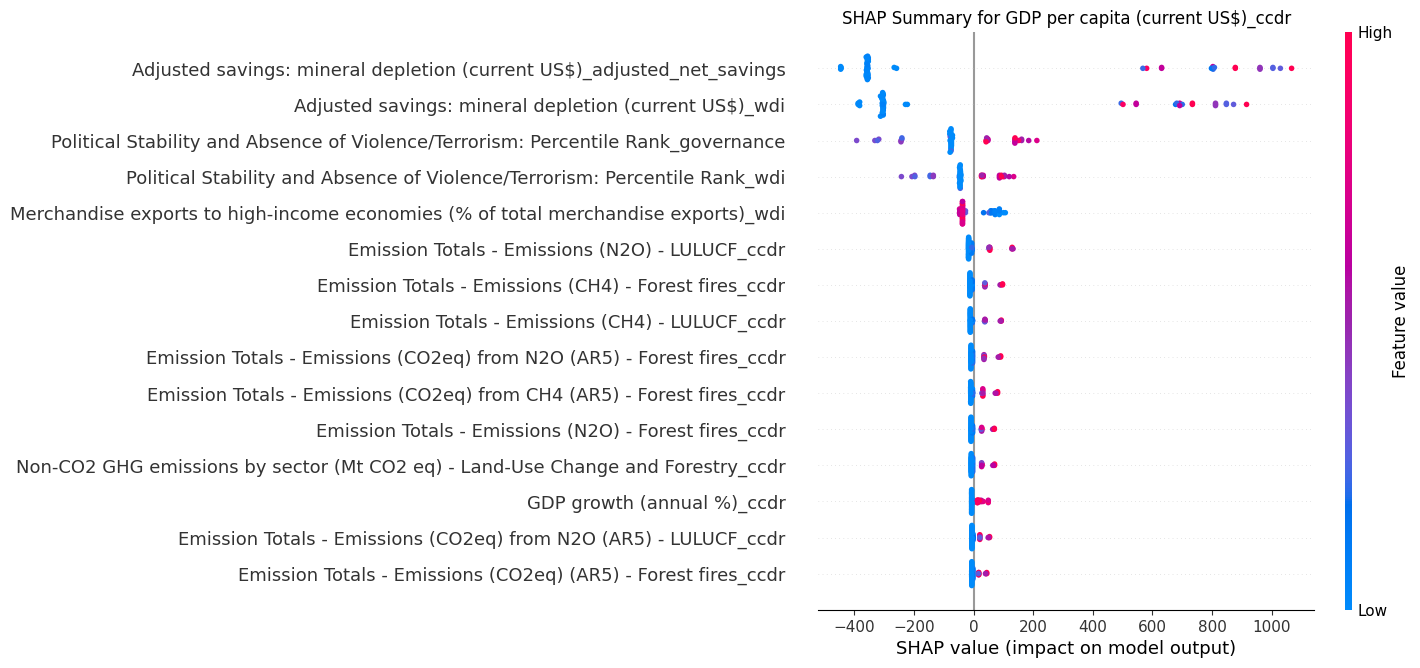


Top 10 Features for: Poverty headcount ratio at $5.50 a day (2011 PPP) (% of population)_ccdr
Gini index (World Bank estimate)_ccdr                                                                                         0.952907
Proportion of population pushed below the $2.15 ($ 2017 PPP) poverty line by out-of-pocket health care expenditure (%)_wdi    0.010072
Income share held by fourth 20%_wdi                                                                                           0.010072
Income share held by third 20%_wdi                                                                                            0.010064
Gini index_wdi                                                                                                                0.009973
Merchandise exports to low- and middle-income economies in South Asia (% of total merchandise exports)_wdi                    0.000448
Research and development expenditure (% of GDP)_wdi                                            

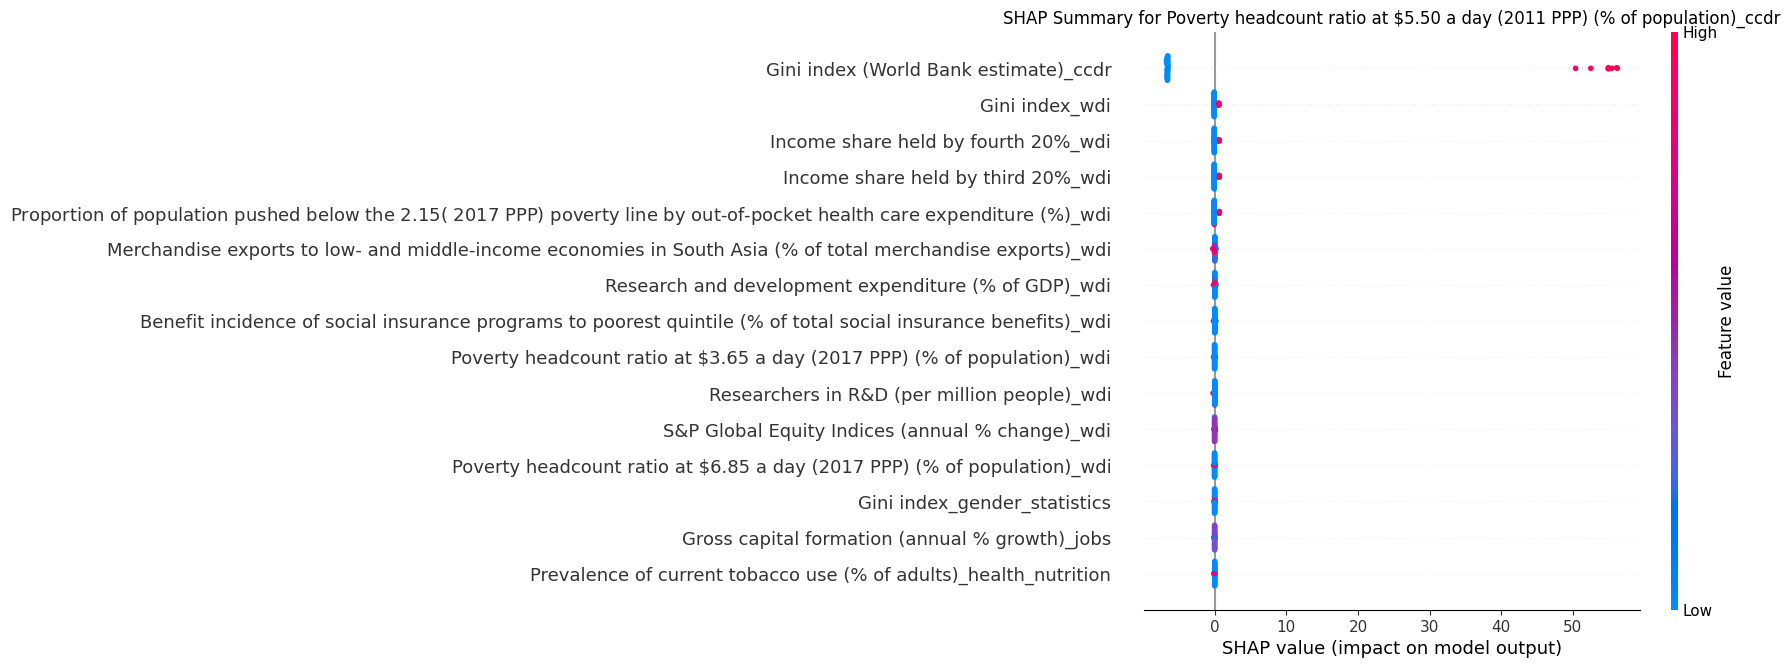


Top 10 Features for: Per capita GHG emissions (tons/capita)_ccdr
Non-CO2 GHG emissions by sector (Mt CO2 eq) - Land-Use Change and Forestry_ccdr                                                        0.876587
Emission Totals - Emissions (CO2eq) from CH4 (AR5) - LULUCF_ccdr                                                                       0.028176
Emission Totals - Emissions (CO2eq) (AR5) - Forest fires_ccdr                                                                          0.018857
Emission Totals - Emissions (CO2eq) from N2O (AR5) - Forest fires_ccdr                                                                 0.009335
Emission Totals - Emissions (N2O) - LULUCF_ccdr                                                                                        0.009085
Emission Totals - Emissions (CO2eq) from CH4 (AR5) - On-farm energy use_ccdr                                                           0.008906
Final consumption expenditure (annual % growth)_wdi                   

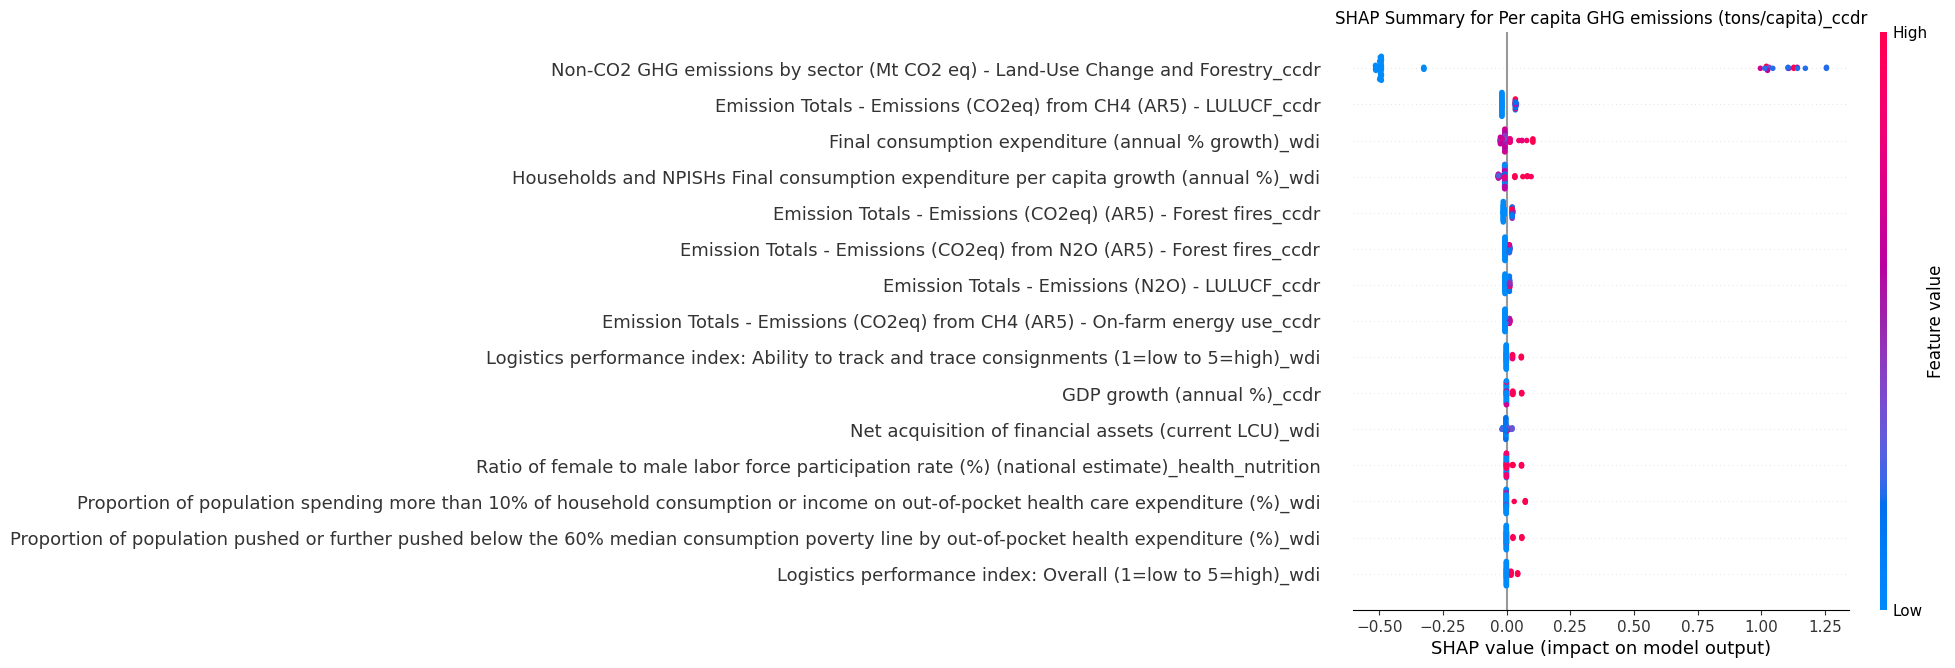

In [7]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# Define targets again for consistency
targets = [
    "GDP per capita (current US$)_ccdr",
    "Poverty headcount ratio at $5.50 a day (2011 PPP) (% of population)_ccdr",
    "Per capita GHG emissions (tons/capita)_ccdr"
]

# Initialize a dictionary to store trained models and their data
rf_models = {}

# Loop to retrain the Random Forest for each target (if not already stored)
for target in targets:
    # Subset for available data
    idx = final_features.index.intersection(df.index[df[target].notna()])
    X = final_features.loc[idx]
    y = df.loc[idx, target]
    
    # Train-test split (used for SHAP too)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    
    rf_models[target] = {
        'model': rf,
        'X_train': X_train,
        'X_test': X_test
    }
    
    # --- FEATURE IMPORTANCE ---
    importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
    print(f"\nTop 10 Features for: {target}")
    print(importances.head(10))
    
    # --- SHAP ANALYSIS ---
    print(f"\nGenerating SHAP values for: {target}")
    explainer = shap.TreeExplainer(rf)
    shap_values = explainer.shap_values(X_test)

    # SHAP summary plot
    shap.summary_plot(shap_values, X_test, max_display=15, show=False)
    plt.title(f"SHAP Summary for {target}")
    plt.tight_layout()
    plt.show()


## Feature Importance and SHAP Analysis

After confirming that Random Forest models achieved high accuracy across all targets, we conducted feature attribution using two methods:

1. **Built-in feature importance** from the Random Forest models
2. **SHAP (SHapley Additive exPlanations)** for model interpretability

These steps are critical to meet the project’s simulation and policy-analysis objectives by identifying which variables most strongly drive changes in key economic and environmental indicators.

---

### GDP per capita (current US$)

**Top Features by Random Forest Importance:**
- Adjusted savings: mineral depletion (current US$)
- Merchandise exports to high-income economies
- Political stability indicators
- Emission totals from LULUCF and forest fires

**Insights:**
- GDP growth is primarily associated with extractive industries and mineral depletion.
- Political stability and trade patterns also contribute significantly.
- Emissions data appears marginal but may signal broader industrial activity.

---

### Poverty headcount ratio at $5.50/day (2011 PPP)

**Top Features by Random Forest Importance:**
- Gini index (inequality measure)
- Health-related poverty metrics
- Income share across population quintiles
- R&D expenditure and social program targeting

**Insights:**
- Inequality (Gini index) dominates as the strongest explanatory factor for poverty levels.
- Out-of-pocket health expenditure and social safety net targeting to lower quintiles are also key levers.
- Education and R&D contribute marginally, likely via structural effects.

---

### Per capita GHG emissions (tons/capita)

**Top Features by Random Forest Importance:**
- Non-CO2 emissions from land-use change and forestry
- CH₄ and N₂O emissions from agriculture and energy use
- Household consumption growth

**Insights:**
- Emissions are primarily driven by land-use, forest fires, and agricultural emissions.
- Consumption patterns and economic growth have a measurable but secondary role.

---

## Conclusion

The combination of feature importance and SHAP analysis confirms that:
- Each target has distinct primary drivers
- The selected model (Random Forest) aligns well with the simulation needs of the project
- These results provide a solid foundation for deploying the model in a policy-facing forecasting tool



In [8]:
# Dictionary mapping original target names to simpler, layman-friendly names
rename_dict = {
    "GDP per capita (current US$)_ccdr": "GDP Per Capita",
    "Poverty headcount ratio at $5.50 a day (2011 PPP) (% of population)_ccdr": "Poverty Rate",
    "Per capita GHG emissions (tons/capita)_ccdr": "GHG Emissions Per Capita"
}

# Rename the target columns in the DataFrame 'df'
df.rename(columns=rename_dict, inplace=True)

# Update the targets list with the new simple names
targets = list(rename_dict.values())

# Print the updated target names to verify the changes
print("Updated target names:", targets)


Updated target names: ['GDP Per Capita', 'Poverty Rate', 'GHG Emissions Per Capita']


In [9]:
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestRegressor

# Assume df (with renamed targets) and final_features are already defined

# Define simplified targets
targets = ["GDP Per Capita", "Poverty Rate", "GHG Emissions Per Capita"]

# Dictionary to store models
trained_models = {}

# Train a Random Forest model for each target and save it
for target in targets:
    # Filter rows where the target is not null
    idx = final_features.index.intersection(df.index[df[target].notna()])
    X = final_features.loc[idx]
    y = df.loc[idx, target]
    
    # Train the model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)
    
    # Store in dictionary
    trained_models[target] = model
    
    # Save the model to file
    joblib.dump(model, f"random_forest_{target.replace(' ', '_').lower()}.pkl")

print("Models trained and saved for deployment.")


Models trained and saved for deployment.
